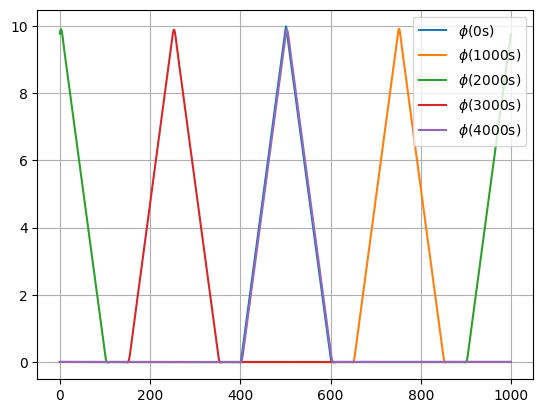

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# function
def funcAdvec(x):
    y = np.zeros(len(x))
    for i in range(0, len(x)):
        if x[i] < 400 or x[i] > 600:
            y[i] = 0
        elif(x[i] < 500):
            y[i] = 0.1*(x[i] - 400)
        else:
            y[i] = 20 - 0.1*(x[i] - 400)
    return y

def linearInterp(a, y1, y2):
    return (1-a)*y1 + (a)*y2
def cubicInterp(a, x1, x2, x3, x4):
    return -a*(1-a**2)  *x1/6   \
        + a*(1+a)*(2-a) *x2/2   \
        + (1-a**2)*(2-a)*x3/2   \
        - a*(1-a)*(2-a) *x4/6

# def lagrangian(x0, y0, u, dt, dx, tinterval, tpoint, filter):
    

u = 0.75; dt = 1.0; dx = 0.5
x0 = np.arange(0, 1000, dx)
y0 = funcAdvec(x0)
xmax = max(x0)
sz = len(x0)
y1 = np.zeros(sz)
t = 0; tpoint = 4010
while t < tpoint:
    for i in range(sz):
        xdepart = x0[i] - u*dt
        if xdepart < 0:
            xdepart = xdepart + max(x0)
        m = int(np.floor(xdepart/dx))
        a = (xdepart - x0[m])/dx
        # y1[i] = (1-a) * y0[m] + a * y0[m + 1] #interpolate
        # y1[i] = linearInterp(a, y0[m], y0[m+1]) #linear
        y1[i] = cubicInterp(a, y0[m-2], y0[m-1], y0[m], y0[m+1])
    y0 = y1.copy()
    if t % 1000 < dt:
        plt.plot(x0, y0, label="$\phi$(" + str(int(np.floor(t))) + "s)")
    t = t + dt
plt.legend()
plt.grid()
plt.show()



In [4]:
linearI = lambda a, y1, y2: a + y1 + y2